## Inisiasi

In [67]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Memuat Data

In [68]:
df = pd.read_csv('datasets/games.csv')

## Mempersiapkan Data

In [69]:
df.shape

(16715, 11)

Total terdapat 16715 baris data dan 11 kolom data `raw`

In [70]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8996,L.A. Rush,XB,2005.0,Racing,0.11,0.03,0.00,0.01,59.0,3,T
1196,Pokemon Mystery Dungeon: Explorers of Sky,DS,2009.0,Role-Playing,0.57,0.43,0.44,0.12,54.0,9,E
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.00,26.0,2.7,T
14382,Onna no Ko to Misshitsu ni Itara **shichau Kam...,3DS,2012.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14879,Battlezone,PSP,2006.0,Shooter,0.02,0.00,0.00,0.00,57.0,tbd,E10+
10238,Invizimals: The Lost Tribes,PSP,2011.0,Action,0.00,0.08,0.00,0.03,NaN,tbd,NaN
9058,Senran Kagura Burst: Guren no Sh?jo-tachi,3DS,2012.0,Action,0.00,0.00,0.14,0.00,NaN,NaN,NaN
15295,Gochuumon wa Usagi Desu ka?? Wonderful Party!,PSV,2016.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8059,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.00,0.03,64.0,6.8,E10+
10106,Pro Yaky? Spirits 5,PS3,2008.0,Sports,0.00,0.00,0.11,0.00,NaN,NaN,NaN


In [71]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Sekilas, pada data ditemukan bahwa terdapat data yang hilang pada kolom `Rating`, `User_Score`, dan `Critic_Score`, kolom dengan tipe yang kurang baik pada kolom `Year_of_Release` yang seharusnya dapat diubah menjadi `int`, dan kolom dengan tipe data yang salah pada kolom `User_Score` yang mana seharusnya memiliki tipe data `float` agar bisa di olah lebih lanjut.

## Memperbaiki Data

In [72]:
coba = df[df['User_Score']=='tbd']
coba.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


`Year_of_Release` dan `User_Score` seharusnya memiliki tipe data `int`.

### Data yang Hilang

In [74]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

nilai `NaN` terbanyak terdapat pada kolom `Critic_Score`, `User_Score`, dan `Rating`. Kemudian terdapat sedikit nilai `NaN` pada kolom `Name` dan `Year_of_Release`

#### Name

Karena kolom `Name` hanya 2 saja dan tidak bisa diubah menjadi sembarang nama maka sebaiknya data tersebut dibuang

In [75]:
df.dropna(subset = ['Name'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64

#### Year_of_Release

In [76]:
df_year = df.groupby('Platform').agg({'Year_of_Release':['median','mean']})
df_year

Year_of_Release             
                  median         mean
Platform                             
2600              1982.0  1982.137931
3DO               1995.0  1994.666667
3DS               2013.0  2013.126953
DC                2000.0  1999.942308
DS                2008.0  2008.185290
GB                1997.0  1995.958763
GBA               2003.0  2003.210851
GC                2003.0  2003.400369
GEN               1993.0  1993.037037
GG                1992.0  1992.000000
N64               1999.0  1998.531646
NES               1986.5  1987.153061
NG                1994.5  1994.500000
PC                2010.0  2008.914316
PCFX              1996.0  1996.000000
PS                1998.0  1998.005882
PS2               2005.0  2004.583921
PS3               2011.0  2010.840735
PS4               2015.0  2015.145408
PSP               2009.0  2008.731769
PSV               2014.0  2014.132867
SAT               1996.0  1996.028902
SCD               1994.0  1993.833333
SNES              1994.0  1993.845188
TG16              1995.0  1995.000000
WS                2000.0  2000.000000
Wii               2009.0  2008.966563
WiiU              2013.0  2013.659864
X360              2010.0  2009.880682
XB                2004.0  2003.636364
XOne              2015.0  2014.951417

Dapat terlihat bahwa `Year_of_Release` suatu *game* akan dipengaruhi dari platform *game* tersebut dapat digunakan, sehingga nilai yang hilang pada `Year_of_Release` dapat diisi berdasarkan nilai `median` nya pada platform masing-masing

In [77]:
# Membuat definisi untuk mengisi kolom yang bersangkutan dengan nilai mediannya
def fill_nan_median(dataframe,agg_column,value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range (size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [78]:
fill_nan_median(df,'Platform','Year_of_Release')
df['Year_of_Release'] = df['Year_of_Release'].astype(int)
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Critic_Score

In [79]:
df.boxplot('Critic_Score')

<Axes: xlabel='Year_of_Release'>

Mengisi nilai `NaN` sebaiknya menggunakan nilai `median`

In [80]:
# Mengelompokkan median dan mean skor kritik berdasarkan genre
df_critic = df.groupby('Genre').agg({'Critic_Score':['median','mean']})
df_critic

Critic_Score           
                   median       mean
Genre                               
Action               68.0  66.629101
Adventure            66.0  65.331269
Fighting             72.0  69.217604
Misc                 69.0  66.619503
Platform             69.0  68.058350
Puzzle               70.0  67.424107
Racing               69.0  67.963612
Role-Playing         74.0  72.652646
Shooter              73.0  70.181144
Simulation           70.0  68.619318
Sports               75.0  71.968174
Strategy             73.0  72.086093

In [81]:
fill_nan_median(df,'Genre','Critic_Score')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,NaN,NaN


Disini digunakan genre untuk mencari nilai `Critic_Score` yang hilang, dikarenakan `Year_of_Release` ataupun `Platform` tidak ada hubungan sama sekali dengan nilai yang didapat. Berbeda dengan `genre` yang memiliki kemungkinan untuk mempengaruhi skor dari kritik karena sifatnya yang subjektif.

#### User_Score

Sama seperti pada `Critic_Score`, genre seharusnya memiliki pengaruh yang cukup besar pada `User_Score` akibat sifatnya yang subjektif. Tetapi sebelum itu, nilai seperti `tbd` *to be determined* diasumsikan sama seperti nilai `NaN` karena sama-sama tidak menunjukkan skor yang pasti.

In [82]:
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)

In [83]:
df['User_Score'] = df['User_Score'].fillna(0).astype(float)
df['User_Score'] = df['User_Score'].replace(0.0, np.nan)
df['User_Score'].describe()

count    7589.000000
mean        7.125985
std         1.497873
min         0.200000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

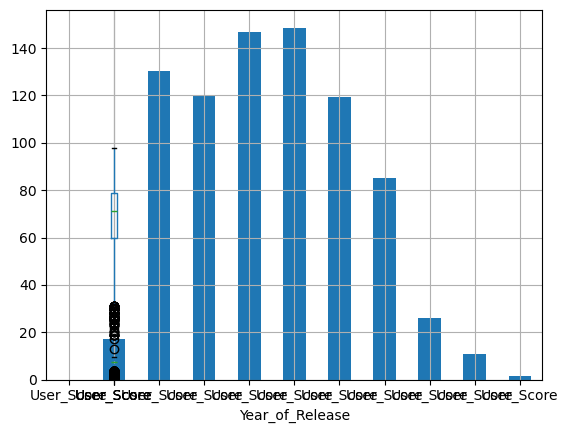

In [84]:
df.boxplot('User_Score')
plt.show()

Terdapat banyak `outlier` pada data, sehingga lebih baik untuk digunakan `median` untuk mengisi nilai `NaN`

In [85]:
df_user = df.groupby('Genre').agg({'User_Score': ['mean','median']})
df_user

User_Score       
                   mean median
Genre                         
Action         7.054044    7.4
Adventure      7.156856    7.6
Fighting       7.302506    7.6
Misc           6.819362    7.1
Platform       7.301402    7.7
Puzzle         7.175000    7.5
Racing         7.036193    7.4
Role-Playing   7.619515    7.8
Shooter        7.041883    7.4
Simulation     7.134593    7.5
Sports         6.961197    7.4
Strategy       7.295177    7.8

Sama seperti pada kolom `Critic_Score`, dapat digunakan berdasarkan nilai `median` setiap `Genre`.

In [86]:
fill_nan_median(df,'Genre','User_Score')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,NaN


#### Rating

Rating merupakan batasan usia minimal yang ditargetkan pembuat game agar audiencenya tidak salah memainkan game tersebut. Pada data kali ini akan diubah nilai `NaN` menjadi *tbd* (*To be determined*) dikarenakan tidak bisa sembarangan memberikan rating, biasanya sudah ada arahan dari si pembuat games.

In [87]:
df['Rating'].value_counts()

Rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [88]:
df['Rating'] = df['Rating'].fillna('tbd')

In [89]:
df_genre = df.groupby('Genre')['Rating'].value_counts()
df_genre

Genre     Rating
Action    tbd       1181
          T          681
          M          608
          E10+       481
          E          416
                    ... 
Strategy  E10+        78
          E           70
          M           25
          K-A          2
          RP           2
Name: count, Length: 67, dtype: int64

In [90]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11590,Skydiving Extreme,PS,2001,Sports,0.04,0.03,0.00,0.01,75.0,7.4,tbd
11992,MLB Front Office Manager,X360,2009,Sports,0.06,0.00,0.00,0.01,47.0,4.6,E
1129,NBA 2K15,X360,2014,Sports,1.35,0.11,0.00,0.17,75.0,3.0,E
2215,SingStar Abba,PS3,2008,Misc,0.27,0.50,0.00,0.16,70.0,5.5,T
9527,Metal Max 3,DS,2010,Role-Playing,0.00,0.00,0.13,0.00,74.0,7.8,tbd
4103,Rayman Raving Rabbids: TV Party,DS,2008,Misc,0.44,0.01,0.00,0.04,69.0,7.1,E10+
12675,Toy Soldiers: War Chest,XOne,2015,Action,0.05,0.00,0.00,0.01,60.0,8.4,tbd
584,Pac-Man: Adventures in Time,PSP,2006,Fighting,0.76,1.09,0.12,0.64,72.0,7.6,tbd
2323,SOCOM 4: U.S. Navy SEALs,PS3,2011,Shooter,0.66,0.11,0.04,0.08,67.0,6.3,M
4483,NiGHTS into dreams...,SAT,1996,Platform,0.00,0.00,0.43,0.00,69.0,7.7,tbd


Data sudah dibersikan

## Mempelajari Penjualan

### Tahun

In [91]:
# Berdasarkan Tahun
Tahun = df.groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Tahun

,NA_sales,EU_sales,JP_sales,Other_sales
Year_of_Release,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,36.74,2.26,0.00,0.38
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


In [92]:
Tahun.plot(kind='bar', figsize=(12,12))

<Axes: xlabel='Year_of_Release'>

In [93]:
Tahun.describe()

,NA_sales,EU_sales,JP_sales,Other_sales
count,37.000000,37.000000,37.000000,37.000000
mean,118.934324,65.517297,35.063243,21.384865
std,107.900700,63.052036,20.341817,25.059274
min,7.760000,0.670000,0.000000,0.120000
25%,28.160000,4.740000,15.760000,0.990000
50%,94.500000,51.220000,39.760000,10.110000
75%,198.550000,114.590000,51.800000,36.860000
max,350.780000,192.890000,73.740000,81.640000


Dapat dilihat bahwa penjualan games populer setelah tahun 2000 hingga tahun 2015, dengan penjualan di NA lebih menguntungkan dibandingkan penjualan lainnya.

### Platform

In [94]:
# Perbedaan penjualan antar platform total
Platform = df.groupby('Platform').agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Platform

,NA_sales,EU_sales,JP_sales,Other_sales
Platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,83.49,61.48,100.67,13.36
DC,5.43,1.69,8.56,0.27
DS,382.40,188.89,175.57,59.26
GB,114.32,47.82,85.12,8.20
GBA,187.54,75.25,47.33,7.73
GC,133.46,38.71,21.58,5.18
GEN,19.27,5.52,2.67,0.89


In [95]:
Platform.sum(axis=1).plot(kind='bar', figsize=(10,10))

<Axes: xlabel='Platform'>

In [96]:
Platform.describe()

,NA_sales,EU_sales,JP_sales,Other_sales
count,31.000000,31.000000,31.000000,31.000000
mean,141.953871,78.198065,41.849677,25.523871
std,176.895754,104.183925,51.429089,44.619719
min,0.000000,0.000000,0.000000,0.000000
25%,3.215000,1.115000,0.915000,0.170000
50%,93.120000,38.710000,15.960000,5.950000
75%,162.855000,108.170000,78.485000,31.645000
max,602.470000,339.290000,175.570000,193.440000


In [97]:
Platform.sum(axis=1).sort_values(ascending= False).head(5)

Platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
dtype: float64

Menurut penjualan pada seluruh daerah, maka penjualan teratas adalah PS2, X360, PS3, Wii, DS. Penjualan game satu dengan yang lainnya sangat besar karena perbedaan antara `mean` dengan `median` cukup besar.

**Mari kita bandingkan rata-rata penjualannya**

In [98]:
Platform_mean = df.groupby('Platform').agg({'NA_sales': 'mean', 'EU_sales': 'mean', 'JP_sales': 'mean', 'Other_sales': 'mean'})
Platform_mean.plot(kind='bar', figsize=(10,10))

<Axes: xlabel='Platform'>

Jika dilihat dari rata-ratanya, maka penjualan terbanyak biasanya memiliki nilai `mean` yang lebih kecil, artinya pembeli lebih mengutamakan platform dengan harga yang lebih murah.

Kita cek satu per satu dari kelima platform teratas 

In [99]:
# Platform X360
# Berdasarkan Tahun
Platform_X360 = df[df['Platform'] == 'X360'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Platform_X360.sum(axis=1).plot(kind='bar')

<Axes: xlabel='Year_of_Release'>

Dapat disimpulkan bahwa terdapat 12 tahun waktu dari munculnya platform X360 hingga jarang digunakan.

In [100]:
# Platform PS2
# Berdasarkan Tahun
Platform_PS2 = df[df['Platform'] == 'PS2'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Platform_PS2.sum(axis=1).plot(kind='bar')

<Axes: xlabel='Year_of_Release'>

Dapat disimpulkan bahwa terdapat 11 tahun waktu dari munculnya platform PS2 hingga jarang digunakan.

In [101]:
# Platform Wii
# Berdasarkan Tahun
Platform_Wii = df[df['Platform'] == 'Wii'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Platform_Wii.sum(axis=1).plot(kind='bar')

<Axes: xlabel='Year_of_Release'>

Dapat disimpulkan bahwa terdapat 8 tahun waktu dari munculnya platform Wii hingga jarang digunakan.

In [102]:
# Platform PS3
# Berdasarkan Tahun
Platform_PS3 = df[df['Platform'] == 'PS3'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Platform_PS3.sum(axis=1).plot(kind='bar')

<Axes: xlabel='Year_of_Release'>

Dapat disimpulkan bahwa terdapat 11 tahun waktu dari munculnya platform PS3 hingga jarang digunakan.

In [103]:
# Platform DS
# Berdasarkan Tahun
Platform_DS = df[df['Platform'] == 'DS'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Platform_DS.sum(axis=1).plot(kind='bar')

<Axes: xlabel='Year_of_Release'>

Dapat disimpulkan bahwa terdapat 11 tahun waktu dari munculnya platform DS hingga jarang digunakan.

**Simpulan**

Dari semua contoh platform, disimpulkan bahwa  rata-rata masa hidup suatu platform selama 11 tahun, dan memiliki masa puncaknya pada pertengahan tahun, yaitu di tahun kelima sampai keenam. Berarti suatu platform yang baru muncul di tahun 2012 dan 2013 memiliki kesempatan untuk menjadi populer di tahun 2017.

### Keuntungan Platform

Setelah mengetahui bahwa masa hidup suatu platform kurang lebih selama 11 tahun, dengan keuntungan terbesarnya di tahun kelima atau keenam, maka akan dicari platform di tahun > 2012 untuk mencari platform yang akan menghasilkan keuntungan terbesar di tahun 2017.

In [104]:
df_buang = df[df['Year_of_Release'] < 2012].reset_index(drop=True)
df_buang.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,tbd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,tbd
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,tbd
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,tbd


In [105]:
df_buang['Platform'].value_counts()

Platform
PS2     2161
DS      2120
Wii     1266
PS      1197
PSP     1036
X360     970
PS3      838
XB       824
GBA      822
PC       724
GC       556
N64      319
SNES     239
SAT      173
2600     133
3DS      116
NES       98
GB        98
DC        52
GEN       27
PSV       18
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Penjualan *games* pada platform diatas dapat diperkirakan akan melemah ditahun 2017 atau tidak ada sama sekali.

In [106]:
Prediksi = df[df['Year_of_Release'] >= 2012].reset_index(drop=True)
Prediksi.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,tbd
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,tbd
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,tbd
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E


In [107]:
Prediksi['Platform'].value_counts()

Platform
PS3     493
PSV     412
3DS     404
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: count, dtype: int64

Setiap platform dapat dilihat satu persatu

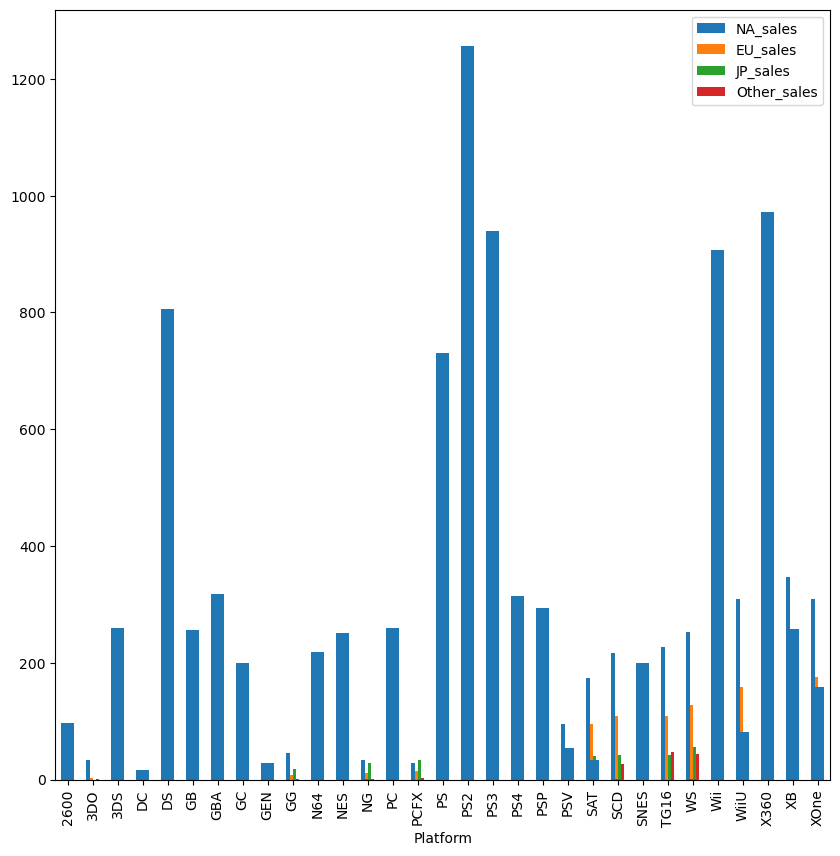

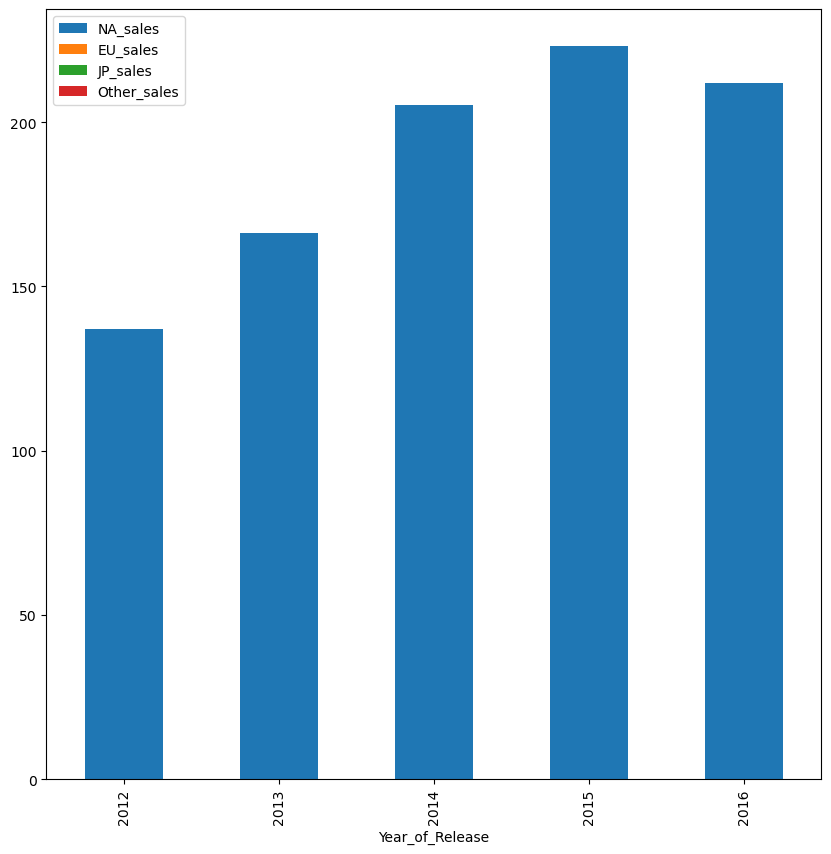

In [108]:
# 3DS
Prediksi_3DS = Prediksi[Prediksi['Platform'] == '3DS'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_3DS.sum(axis=1).plot(kind='bar')
plt.show()

3DS sudah ada sejak lama, sehingga dari grafik dapat disimpulkan bahwa pada tahun 2017 penjualannya akan semakin melemah

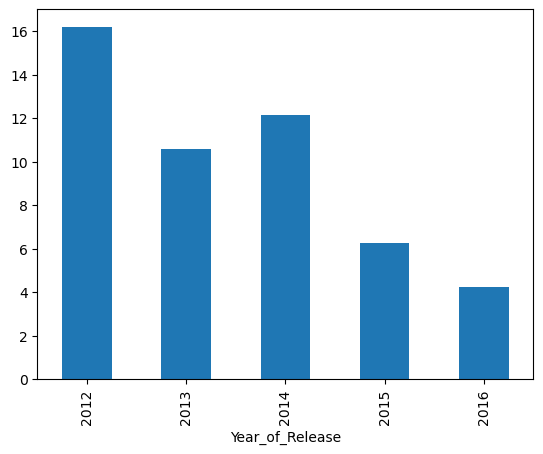

In [109]:
# PSV
Prediksi_PSV = Prediksi[Prediksi['Platform'] == 'PSV'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_PSV.sum(axis=1).plot(kind='bar')
plt.show()

PSV sudah ada sejak lama, sehingga dari grafik dapat disimpulkan bahwa pada tahun 2017 penjualannya akan semakin melemah

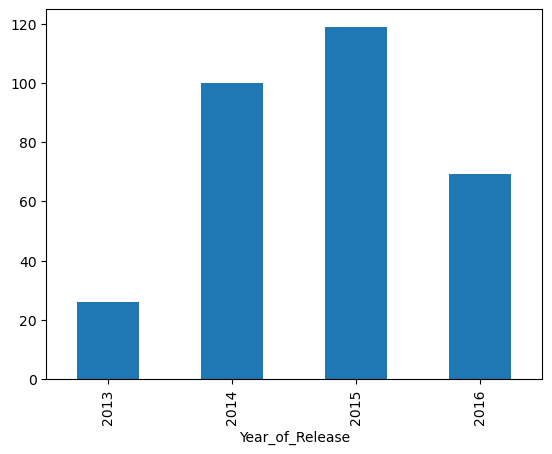

In [110]:
# PS4
Prediksi_PS4 = Prediksi[Prediksi['Platform'] == 'PS4'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_PS4.sum(axis=1).plot(kind='bar')
plt.show()

PS4 dapat dibilang masih baru, karena baru muncul ditahun 2013, sehingga dari grafik dapat disimpulkan bahwa pada tahun 2017 penjualannya ada kemungkinan akan menguat walaupun terlihat ada pengurangan pada tahun 2016.

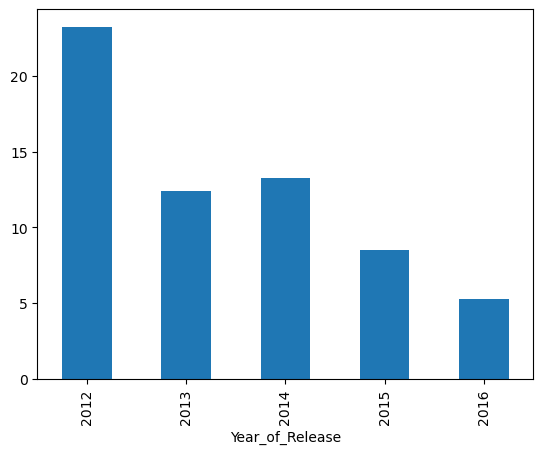

In [111]:
Prediksi_PC = Prediksi[Prediksi['Platform'] == 'PC'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_PC.sum(axis=1).plot(kind='bar')
plt.show()

Berdasarkan data, popularitas PC akan semakin menurun, mengingat PC sudah ada sejak lama

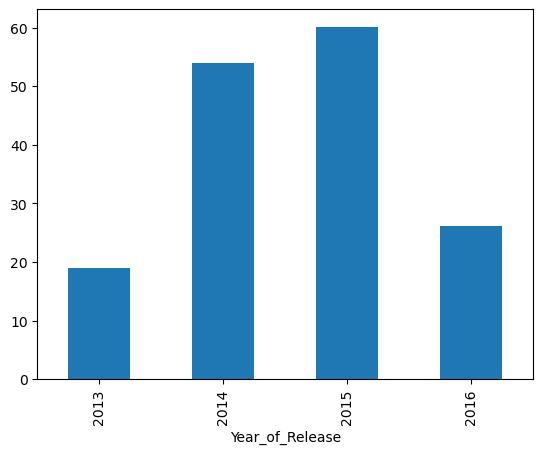

In [112]:
# XOne
Prediksi_XOne = Prediksi[Prediksi['Platform'] == 'XOne'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_XOne.sum(axis=1).plot(kind='bar')
plt.show()

Ada kemungkinan XOne bisa meraih popularitas, walaupun kemungkinan tersebut sedikit dikarenakan pada tahun 2016 hanya memiliki keuntungan yang kecil.

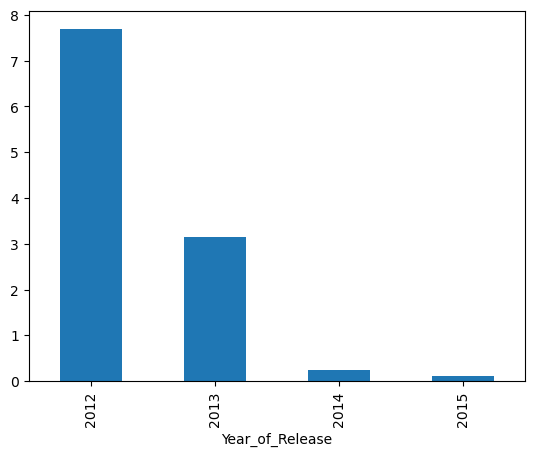

In [113]:
# PSP
Prediksi_PSP = Prediksi[Prediksi['Platform'] == 'PSP'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_PSP.sum(axis=1).plot(kind='bar')
plt.show()

PSP sudah tidak akan populer lagi

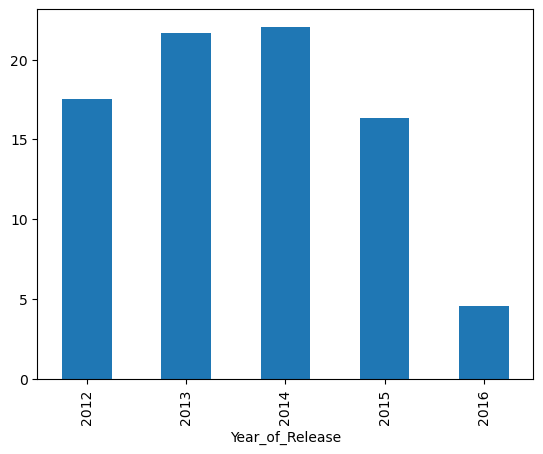

In [114]:
# WiiU
Prediksi_WiiU = Prediksi[Prediksi['Platform'] == 'WiiU'].groupby(['Year_of_Release']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Prediksi_WiiU.sum(axis=1).plot(kind='bar')
plt.show()

Walaupun WiiU merupakan platform baru, berdasarkan tren data, didapat bahwa hasil penjualan sangat minim dan kemungkinan hanya akan terus memburuk walaupun masa hidup platform pada umumnya hingga 11 tahun.

**Simpulan**

Berdasarkan data yang diambil, dibandingkan dengan platform lainnya berdasarkan nilai penjualan yang dihasilkan dan masa hidupnya yang baru, PS4 dan XOne memiliki peluang untuk menjadi lebih populer di tahun 2017 jika pemasarannya sukses.

### Ulasan

In [115]:
Ulasan = df.groupby(['Platform']).agg({'Critic_Score':['median'], 'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Ulasan

,Critic_Score,NA_sales,EU_sales,JP_sales,Other_sales
,median,sum,sum,sum,sum
Platform,,,,,
2600,69.0,90.60,5.47,0.00,0.91
3DO,70.0,0.00,0.00,0.10,0.00
3DS,69.0,83.49,61.48,100.67,13.36
DC,72.0,5.43,1.69,8.56,0.27
DS,69.0,382.40,188.89,175.57,59.26
GB,70.0,114.32,47.82,85.12,8.20
GBA,69.0,187.54,75.25,47.33,7.73
GC,70.0,133.46,38.71,21.58,5.18


### Genre

Merupakan sebuah data yang bersifat kategorikal, digunakan untuk memisahkan *style* atau cara bermain dari satu *game* dengan *game* lainnya.

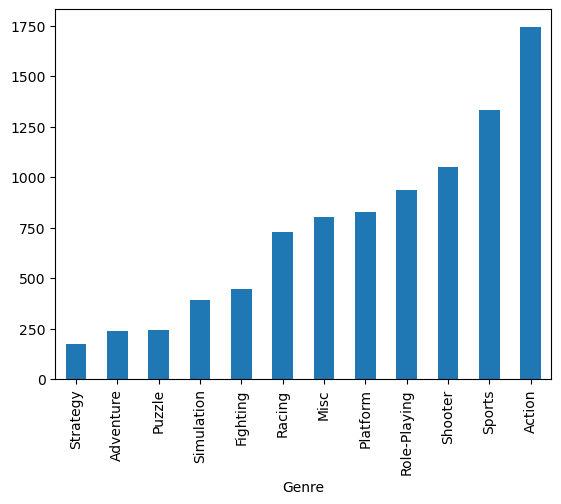

In [116]:
Genre = df.groupby(['Genre']).agg({'NA_sales': 'sum', 'EU_sales': 'sum', 'JP_sales': 'sum', 'Other_sales': 'sum'})
Genre_sum = Genre.sum(axis=1).sort_values()
Genre_sum.plot(kind='bar')
plt.show()

In [117]:
Genre_sum.describe()

count      12.000000
mean      742.774167
std       479.876035
min       174.230000
25%       353.120000
50%       765.590000
75%       964.032500
max      1744.170000
dtype: float64

Berdasarkan data, didapat bahwa 5 penjualan genre teratas / lebih menguntungkan terdapat pada game dengan genre Action, Sports, Shooter, Role-Playing, dan Platform. Sedangkan genre dengan penghasilan terendah adalah strategy kemungkinan karena biasanya pembeli memainkan game untuk relaksasi bukan untuk belajar. Kemungkinan gabungan genre dari strategy dan action dapat membuat genre strategy akan lebih banyak dipilih.

## Uji Hipotesis

In [118]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6182,Batman: The Brave and the Bold the Videogame,Wii,2010,Action,0.20,0.05,0.0,0.02,68.0,7.4,tbd
11026,Pro Evolution Soccer 2012,PC,2011,Action,0.00,0.07,0.0,0.02,77.0,6.4,tbd
6459,Ford Racing 3,PS2,2004,Racing,0.13,0.10,0.0,0.03,50.0,6.6,E
12780,Dr. Muto,XB,2002,Platform,0.04,0.01,0.0,0.00,70.0,7.7,T
14592,Valentino Rossi: The Game,XOne,2016,Racing,0.01,0.02,0.0,0.00,74.0,8.1,E


**Rata-rata `User_Score` pengguna platform Xbox One dan PC adalah sama**

In [119]:
XboxOne = df[df['Platform'] == 'XOne']['User_Score'].reset_index(drop=True)
PC = df[df['Platform'] == 'PC']['User_Score'].reset_index(drop=True)

In [120]:
alpha = 0.05 # tingkat signifikansi statistik kritis

results = st.ttest_ind(XboxOne,PC, equal_var=False)# uji hipotesis bahwa rata-rata dari dua populasi independen tersebut adalah setara

print('p-value:', results.pvalue)# nilai p yang didapat

if (results.pvalue < alpha):# bandingkan nilai p yang kamu dapatkan dengan tingkat signifikansi:):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value: 1.45285063989343e-05
Kita menolak hipotesis nol


Artinya User_Score dari platform `Xbox One` dan `PC` berbeda

**Rata-rata rating pengguna genre `Action` dan `Sports` berbeda.**

In [121]:
Action = df[df['Genre'] == 'Action']['User_Score'].reset_index(drop=True)
Sports = df[df['Genre'] == 'Sports']['User_Score'].reset_index(drop=True)

In [122]:
alpha = 0.05 # tingkat signifikansi statistik kritis

results = st.ttest_ind(Action,Sports, equal_var=False)# uji hipotesis bahwa rata-rata dari dua populasi independen tersebut adalah setara

print('p-value:', results.pvalue)# nilai p yang didapat

if (results.pvalue < alpha):# bandingkan nilai p yang kamu dapatkan dengan tingkat signifikansi:):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value: 0.5383281050121103
Kita tidak bisa menolak hipotesis nol


Artinya `User_Score` dari genre `Action` dan `Sports` sama

## Kesimpulan

Kesimpulan yang didapat dari project ini:

1. Untuk data yang hilang pada kolom `Critic_Score`, `User_Score`, dan `Rating`, digunakan pengelompokan terhadap `Genre` dikarenakan sifatnya yang subjektif.
2. Untuk prediksi di tahun 2017, maka Xbox One dan PS4 memiliki peluang untuk populer dari platform lainnya.
3. Didapat bahwa `Genre` mempengaruhi hasil dari penjualan dengan `Genre` `Action` menempati posisi pertama. 